In [ ]:
! pip install -U giotto-tda
! pip install gudhi
!pip install -U kaleido # when needing saving pdf run this and restart kernel
!pip install plotly==5.5.0
!pip install numpy==1.24.4 # This version of numpy is required since some packages have not caught upto the recent version

These two modules contains the necessary classes for implementing the experiments

In [26]:
import data_gans as dg
import topology as tg
import violin_plot as vp

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import  resize

save the distribution of $E$ in the form of a numpy file

sample size :  400  : size of class  :  500
(400, 64, 64, 3)


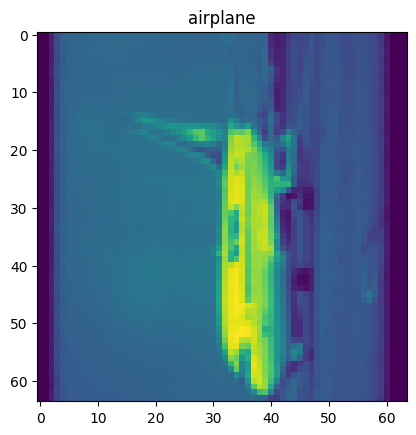

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


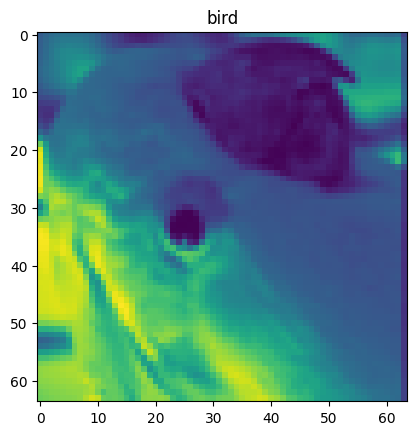

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


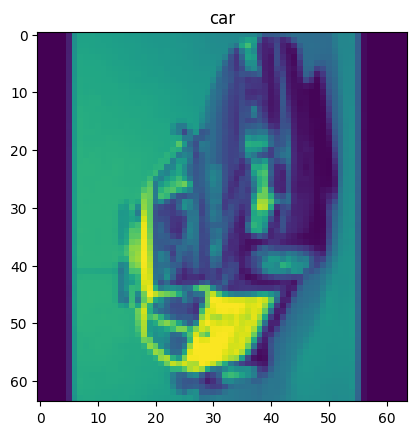

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


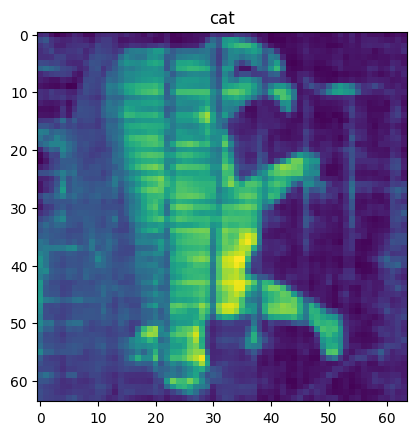

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


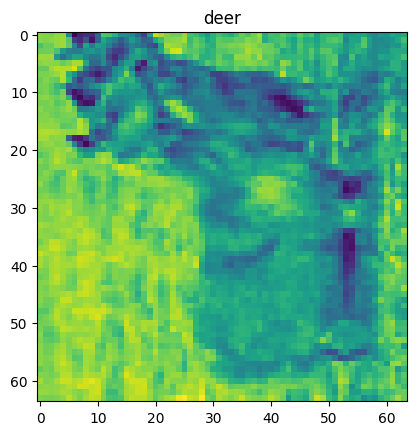

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


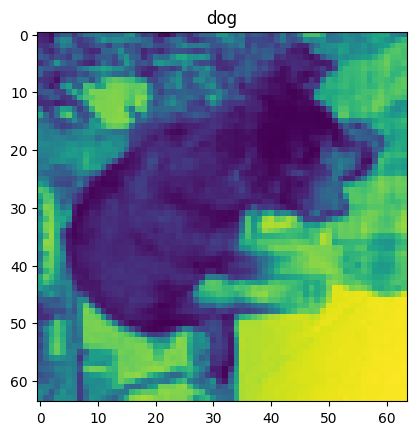

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


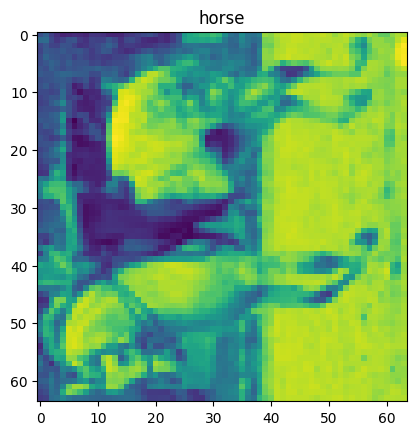

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


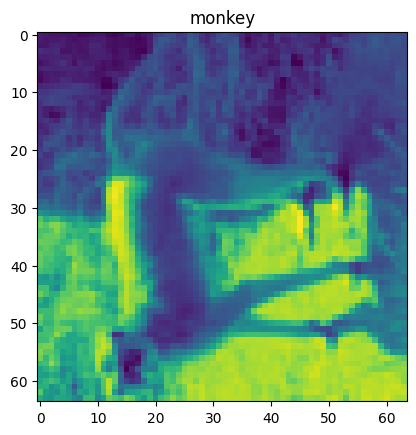

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


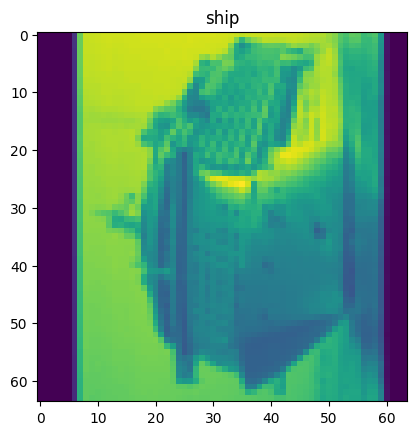

(400, 64, 64)
(400, 64, 64)
sample size :  400  : size of class  :  500
(400, 64, 64, 3)


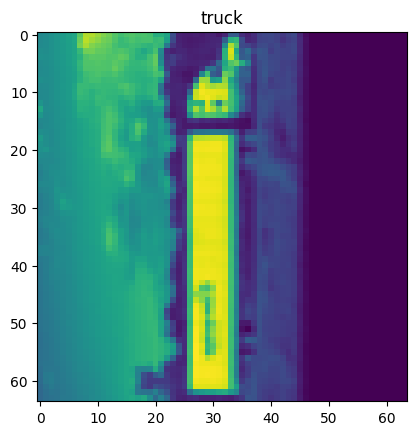

(400, 64, 64)
(400, 64, 64)


In [4]:
name_data = "stl10"
XD = dg.get_balanced_data(data_name=name_data,transform_type="3d")
unique_label = np.unique(XD.indicies)
sample_class = []
all_Topos = []
for i in unique_label:
  data_index = XD.single_class_sample(i,sample_size = 400)
  data_temp = XD.data_array[data_index,:]
  print(data_temp.shape)
  data_temp = data_temp.mean(axis=3) #compute the mean for the greyscale image
  plt.imshow(data_temp[np.random.randint(len(data_temp))])
  plt.title(XD.class_names[i])
  plt.show()
  print(data_temp.shape)
  Topo = tg.topo_measures(data_temp,data_name="image",to_grey=False,homology_get = (0,1))
  print(data_temp.shape)
  Topo.topo_metric(Topo.pdx)
  Topo.val_acrossPD(across_val=0)
  sample_class.append(Topo.summaries["E"])
sample_class = np.asarray(sample_class)
np.save(name_data+"_alldiff_class.npy",np.asarray(sample_class,dtype="object"))

The epps values for different class vs the class j. Notice that some are simliar while others are not this experiment reflects that topological diversity can capture mode collapse to some extend as different classes can contribute to the topological diversity of the $E$

In [6]:
print(name_data);j=0
for i in range(len(sample_class)):
       a = tg.norm_arr(sample_class[i])
       b = tg.norm_arr(sample_class[j])
       print(i,":",j,":",stats.epps_singleton_2samp(a,b))
       #print(i,":",j,":",stats.ks_2samp(a,b))

stl10
0 : 0 : Epps_Singleton_2sampResult(statistic=0.0, pvalue=1.0)
1 : 0 : Epps_Singleton_2sampResult(statistic=9.574094662996263, pvalue=0.0482468311016034)
2 : 0 : Epps_Singleton_2sampResult(statistic=44.84203791513936, pvalue=4.288258663564572e-09)
3 : 0 : Epps_Singleton_2sampResult(statistic=83.75332942232768, pvalue=2.788794996245282e-17)
4 : 0 : Epps_Singleton_2sampResult(statistic=213.10902563005888, pvalue=5.696284867413687e-45)
5 : 0 : Epps_Singleton_2sampResult(statistic=134.64905228873644, pvalue=3.9437232166228524e-28)
6 : 0 : Epps_Singleton_2sampResult(statistic=224.67892338177396, pvalue=1.844900010285069e-47)
7 : 0 : Epps_Singleton_2sampResult(statistic=17.016116741539374, pvalue=0.0019190621378186896)
8 : 0 : Epps_Singleton_2sampResult(statistic=132.38751577924796, pvalue=1.2015591148797006e-27)
9 : 0 : Epps_Singleton_2sampResult(statistic=9.001420150360754, pvalue=0.06106399375858703)


Observe that transpose of the image doesnot induce change in the persistence diagram while using cubical homology. In the experiments we are computing $E$ for individual images so computing for transpose or for the orginal image yields same results

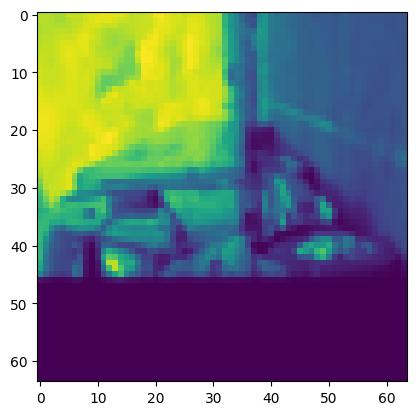

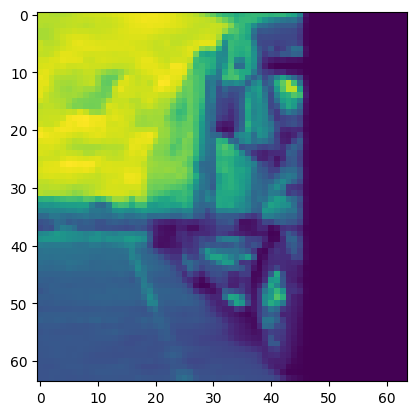

{'PE': array([[0.23540453, 5.35984927],
        [0.54617565, 6.68120812],
        [0.23540453, 5.35984927],
        [0.54617565, 6.68120812]]),
 'landscape': array([[[0.        , 0.        ],
         [0.2439393 , 0.45312983],
         [0.        , 0.        ],
         [0.2439393 , 0.45312983]],
 
        [[0.2439393 , 0.45312983],
         [0.        , 0.        ],
         [0.2439393 , 0.45312983],
         [0.        , 0.        ]],
 
        [[0.        , 0.        ],
         [0.2439393 , 0.45312983],
         [0.        , 0.        ],
         [0.2439393 , 0.45312983]],
 
        [[0.2439393 , 0.45312983],
         [0.        , 0.        ],
         [0.2439393 , 0.45312983],
         [0.        , 0.        ]]]),
 'wasserstein': array([[[0.        , 0.        ],
         [0.84348783, 1.02230833],
         [0.        , 0.        ],
         [0.8435476 , 1.02253562]],
 
        [[0.8436205 , 1.02316125],
         [0.        , 0.        ],
         [0.84353645, 1.02405685],
        

In [7]:
plt.imshow(data_temp[1])
plt.show()
plt.imshow(data_temp[1].T)
plt.show()
Topo = tg.topo_measures(np.asarray([data_temp[1],data_temp[2],data_temp[1].T,data_temp[2].T]))
Topo.ssim(Topo.data_numpy)
Topo.topo_metric(Topo.pdx,m_name=['landscape','wasserstein'])
Topo.val_acrossPD(across_val=0)
Topo.summaries

In [15]:
tg.plot_diagm_pd(Topo.pdx,diag_num=0,save_fig=False,name="example")

We see the impact of resizing and topological diversity in this section. In particular we resample (uniform random) each time to create diversity in the sampled images.

In [8]:
name_data = "stl10"
XD = dg.get_balanced_data(data_name=name_data,transform_type="3d")
resize_size = [28,32,40,64,80,90,150]
sample_resize = [];data = {};label={}
all_Topos = []
for i in resize_size:
  data_temp,label = XD.return_sample_set(sample_size=400)
  data_temp = data_temp[:400]
  tuple_shape = data_temp.shape
  data_temp = resize(data_temp,(tuple_shape[0],i,i,tuple_shape[3]))
  data_temp = data_temp.mean(axis=3)
  print(data_temp.shape)
  Topo = tg.topo_measures(data_temp,data_name="image",to_grey=False,homology_get = (0,1))
  print(data_temp.shape)
  Topo.topo_metric(Topo.pdx)
  Topo.val_acrossPD(across_val=0)
  sample_resize.append(Topo.summaries["E"])
  #all_Topos.append(Topo3)
sample_resize = np.asarray(sample_resize)
np.save(name_data+"_alldiff_resize.npy",np.asarray(sample_resize,dtype="object"))

class names accessed 
The shape of the instance in dataset :   (3, 64, 64)
The shape of the X array :   (5000, 64, 64, 3)
The shape of the index array :  (5000,)
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
sample size :  40  : size of class  :  500
The length of the sub index :   400
Check if the sample has unique index :  (400,)
class :  0  inbalance  :  (40,)
class :  1  inbalance  :  (40,)
class :  2  inbalance  :  (40,)
class :  3  inbalance  :  (40,)
class :  4  inbalance  :  (40,)
class :  5  inbalance  :  (40,)
class :  6  inbalance  :  (40,)
class :  7  inbalance  :  (40,)
class :  8  inbalance  :  (40,)
class :  9  inbalance  :  (40,)
The s

/content/violin_plot.py:18: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14

/content/violin_plot.py:18: UserWarning:

The palette list has more values (9) than needed (7), which may not be intended.



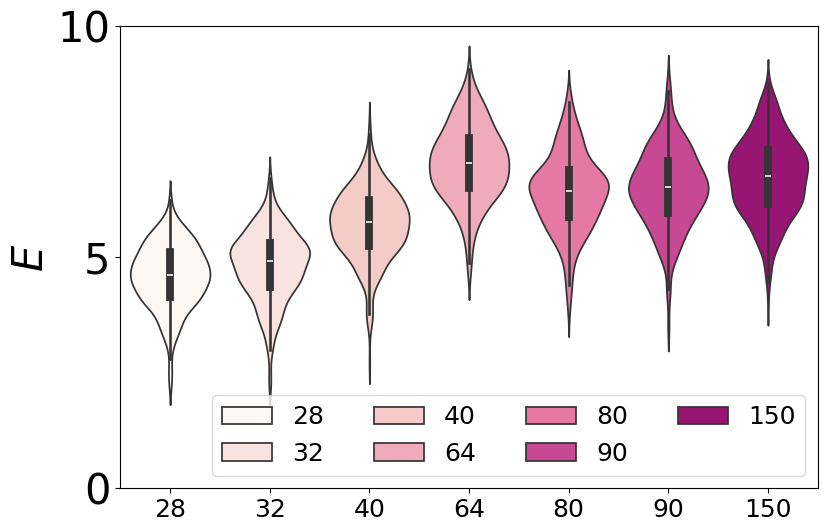

In [28]:
vp.plot_violin_resize(path="/content/stl10_alldiff_resize.npy",name_data=name_data,resize_size=resize_size)

We observe some difference in the eps values with greater values when the dimensions are far apart. This shows that resize does affect the topological diversity.

In [9]:
print(name_data)
for i in range(len(sample_resize)):
  for j in range(len(sample_resize)):
       a = tg.norm_arr(sample_resize[i])
       b = tg.norm_arr(sample_resize[j])
       print(i,":",j,":",stats.epps_singleton_2samp(a,b))

stl10
0 : 0 : Epps_Singleton_2sampResult(statistic=0.0, pvalue=1.0)
0 : 1 : Epps_Singleton_2sampResult(statistic=2.9102927276892196, pvalue=0.5729481897148566)
0 : 2 : Epps_Singleton_2sampResult(statistic=14.92675030556996, pvalue=0.004855578132575938)
0 : 3 : Epps_Singleton_2sampResult(statistic=16.332076317978668, pvalue=0.002604451949943479)
0 : 4 : Epps_Singleton_2sampResult(statistic=16.265736041992533, pvalue=0.002682547854308851)
0 : 5 : Epps_Singleton_2sampResult(statistic=13.616172734485982, pvalue=0.008626413401825794)
0 : 6 : Epps_Singleton_2sampResult(statistic=7.260600303554524, pvalue=0.12274104622040005)
1 : 0 : Epps_Singleton_2sampResult(statistic=2.9102927276892196, pvalue=0.5729481897148566)
1 : 1 : Epps_Singleton_2sampResult(statistic=0.0, pvalue=1.0)
1 : 2 : Epps_Singleton_2sampResult(statistic=8.122798375509621, pvalue=0.08718210183149368)
1 : 3 : Epps_Singleton_2sampResult(statistic=13.381846044316442, pvalue=0.00955317024304559)
1 : 4 : Epps_Singleton_2sampResult

Comparing with the orginal and generated : The bad gan generated images of shape 32 x 32 and the good gan 64 x 64. In this excersise see that the eps value under 32 resize for the bad gan is greater than the eps values of good gan under resize 64

In [12]:
resize_size = [28,32,40,64,80,90,150]
diff_resize_val = np.asarray(np.load("/content/stl10_alldiff_resize.npy",allow_pickle=True), dtype=float)
bad_gan_val = np.load("/content/badstl10dcgan.npy",allow_pickle=True)# contains PE  of the generated images
good_gan_val = np.load("/content/stl10r1gan.npy",allow_pickle=True)#contains PE of the generated images
for i in range(len(diff_resize_val)):
  print(resize_size[i])
  a = tg.norm_arr(diff_resize_val[i])
  b = tg.norm_arr(bad_gan_val[-1].sum(axis=1))
  c = tg.norm_arr(good_gan_val[-1].sum(axis=1))
  print("BAD:",stats.epps_singleton_2samp(a,b))
  print("GOOD:",stats.epps_singleton_2samp(a,c))

28
BAD: Epps_Singleton_2sampResult(statistic=291.86491163425245, pvalue=6.158251842400826e-62)
GOOD: Epps_Singleton_2sampResult(statistic=8.145513867584993, pvalue=0.08639093824835872)
32
BAD: Epps_Singleton_2sampResult(statistic=279.73660029745264, pvalue=2.539699457761163e-59)
GOOD: Epps_Singleton_2sampResult(statistic=17.167236676574582, pvalue=0.0017935415029401351)
40
BAD: Epps_Singleton_2sampResult(statistic=327.60341594065704, pvalue=1.1989023472668133e-69)
GOOD: Epps_Singleton_2sampResult(statistic=43.68383421019417, pvalue=7.462914707842967e-09)
64
BAD: Epps_Singleton_2sampResult(statistic=231.73556429629875, pvalue=5.584141119399426e-49)
GOOD: Epps_Singleton_2sampResult(statistic=29.173224778023698, pvalue=7.208857905857485e-06)
80
BAD: Epps_Singleton_2sampResult(statistic=234.07675652481973, pvalue=1.7494493921957842e-49)
GOOD: Epps_Singleton_2sampResult(statistic=34.53652016055503, pvalue=5.78345180676434e-07)
90
BAD: Epps_Singleton_2sampResult(statistic=274.17398035919365,